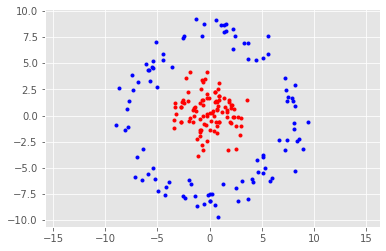

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('ggplot')
import numpy as np
n=100

#polar coordinate
r1=8+np.random.randn(n)
theta1=np.random.rand(n)*2.0*np.pi

r2=2+np.random.randn(n)
theta2=np.random.rand(n)*2.0*np.pi

x1=np.concatenate( (r1*np.cos(theta1), r2*np.cos(theta2)))
x2=np.concatenate( (r1*np.sin(theta1), r2*np.sin(theta2)))
yt=np.ones( (2*n,1))
yt[n:]=-1
plt.axis('equal')
plt.plot(x1[(yt==1)[:,0]],x2[(yt==1)[:,0]],'.b')
plt.plot(x1[(yt==-1)[:,0]],x2[(yt==-1)[:,0]],'.r')

In [2]:
x=np.concatenate( (x1.reshape((-1,1)), x2.reshape((-1,1))), axis=1 )
x.shape

(200, 2)

In [3]:
def forward(a,w,b):
    z=np.dot(a,w)+b
    return np.tanh(z)

def g(a):
    return 1-a*a

In [4]:
k0=2
k1=3
k2=1
w1=np.random.randn(k0,k1)
b1=np.random.randn(1,k1)
w2=np.random.randn(k1,k2)
b2=np.random.randn(1,k2)
m=1000
alpha=0.001
for i in range(m):
    #forward
    a1=x
    a2=forward(a1,w1,b1)
    a3=forward(a2,w2,b2)
    yp=a3
    L=0.5*np.average((yp-yt)*(yp-yt))
    #back propagation
    da3= (yp-yt)*g(a3)
    dz2= np.dot(da3,w2.T)
    da2= dz2*g(a2)
    w1=w1-alpha*np.dot(a1.T, da2)
    b1=b1-alpha*np.sum(da2,axis=0)
    w2=w2-alpha*np.dot(a2.T, da3)
    b2=b2-alpha*np.sum(da3,axis=0)
    if i%(m//10)==0:
        print("Loss: %s"%L)
        #print(" w1:%s, b1:%s, w2:%s, b2:%s "%(w1,b1,w2,b2) )

Loss: 0.6675273121016037
Loss: 0.3261312906855543
Loss: 0.21543010921756128
Loss: 0.20130864714448232
Loss: 0.1932060651013034
Loss: 0.19587949299880145
Loss: 0.17873842893799743
Loss: 0.03785365044138974
Loss: 0.02537693097012779
Loss: 0.020332333431661725


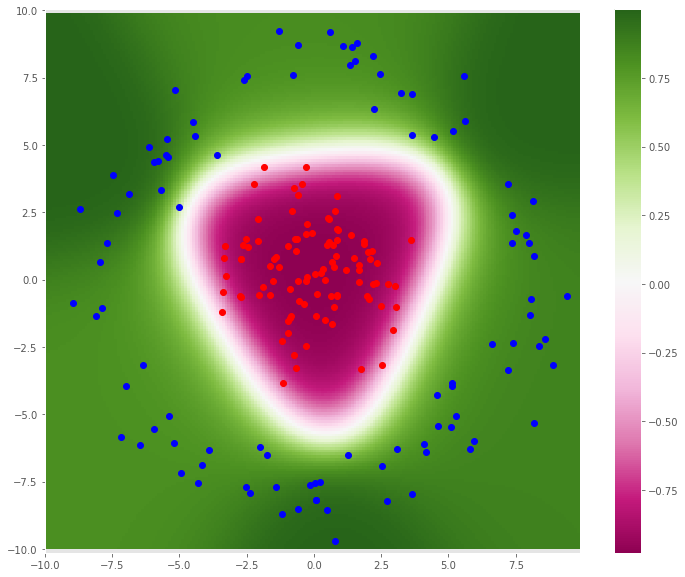

In [19]:
my,mx=np.mgrid[slice(-10,10,0.1),slice(-10,10,0.1)]
out=np.zeros(mx.shape)
for i in range(mx.shape[0]):
    for j in range(mx.shape[1]):
        u=[ mx[i,j], my[i,j]]
        #forward
        a1=u
        a2=forward(a1,w1,b1)
        a3=forward(a2,w2,b2)
        yp=a3
        out[i,j]=yp
plt.figure(figsize=(12,10))
plt.pcolor(mx,my,out,cmap=cm.PiYG)
plt.colorbar()
plt.axis('equal')
plt.plot(x1[(yt==1)[:,0]],x2[(yt==1)[:,0]],'ob')
plt.plot(x1[(yt==-1)[:,0]],x2[(yt==-1)[:,0]],'or')


In [6]:
a3.shape

(1, 1)

In [7]:
yt.shape

(200, 1)